# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [161]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [162]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [163]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [164]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

Terdapat field-field yang secara jumlah baris tidak seragam banyaknya/null. Hal ini perlu menjadi perhatian untuk melakukan pre-processing terlebih dahulu terhadap field-field tersebut baik dengan melakukan imputasi maupun drop data. Selain itu juga perlu dilakukan penyesuaian tipe data terhadap beberapa field yang digunakan seperti pada field TransactionDate yang seharusnya bertipe data Date. Dengan melakukan pre-processing data terlebih dahulu diharapkan dapat memperoleh hasil optimal saat melakukan metode clustering terhadap data tersebut.

In [165]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Pada hasil tersebut dapat dilihat pada field TransactionAmount dan AccountBalance dimana selisih antara nilai minimum dan maksimun TransactionAmount dan AccountBalance terpaut cukup jauh dan jika dilihat dari percentile ke-3, nilai dari masing-masing field TransactionAmount dan AccountBalance terpaut cukup jauh dengan nilai max nya. Hal ini dapat mengindikasikan adanya outlier. Oleh karena itu perlu dilakukan analisis lebih lanjut (menggunakan box plot) untuk mengecek outlier.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [166]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


Berdasarkan hasil tersebut diketahui nilai korelasi terbesar antara parameter AccountBalance dengan CustomerAge. Hal ini masuk akal karena usia dewasa pada umumnya sudah bekerja sehingga memperoleh pemasukan yang berdampak pada tingginya AccountBalance pada customer dewasa.

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

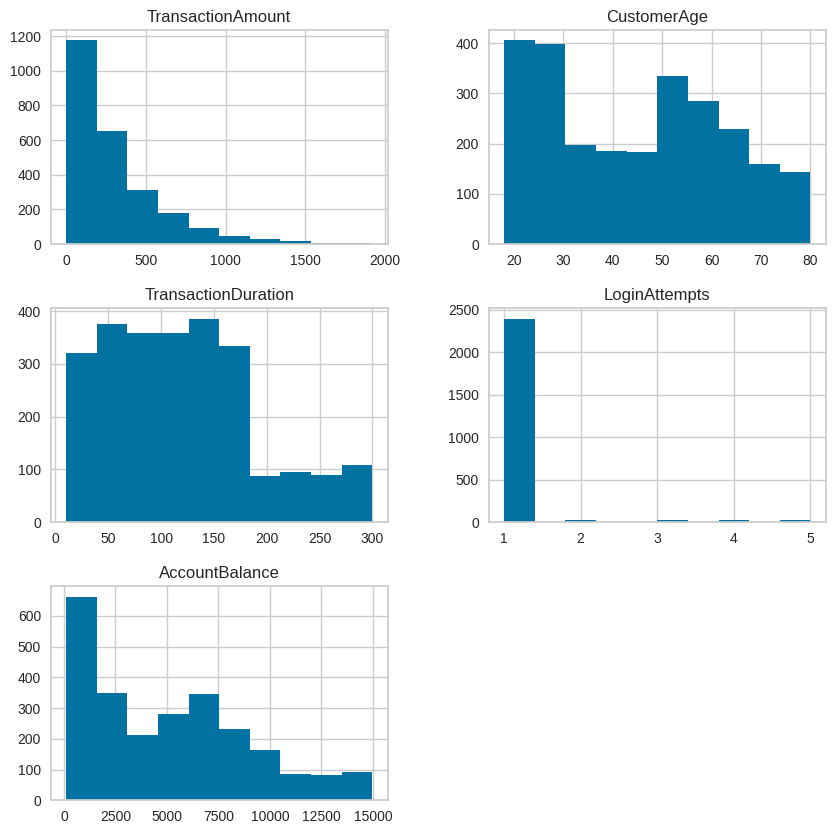

In [167]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df_numeric.hist(figsize=(10, 10), bins=10)

Berdasarkan grafik-grafik tersebut dapat dilihat pola distribusi data berbentuk Right Skewed. Secara intuitif hal ini menunjukkan mayoritas dari konsumen masih memiliki TransactionAmount dan AccountBalance yang masih rendah. CustomerAge yang masih didominasi oleh usia yang relatif muda. TransactionDuration yang cukup singkat. Dan pada LoginAttempts, ini menunjukkan kewajaran user untuk melakukan akses.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

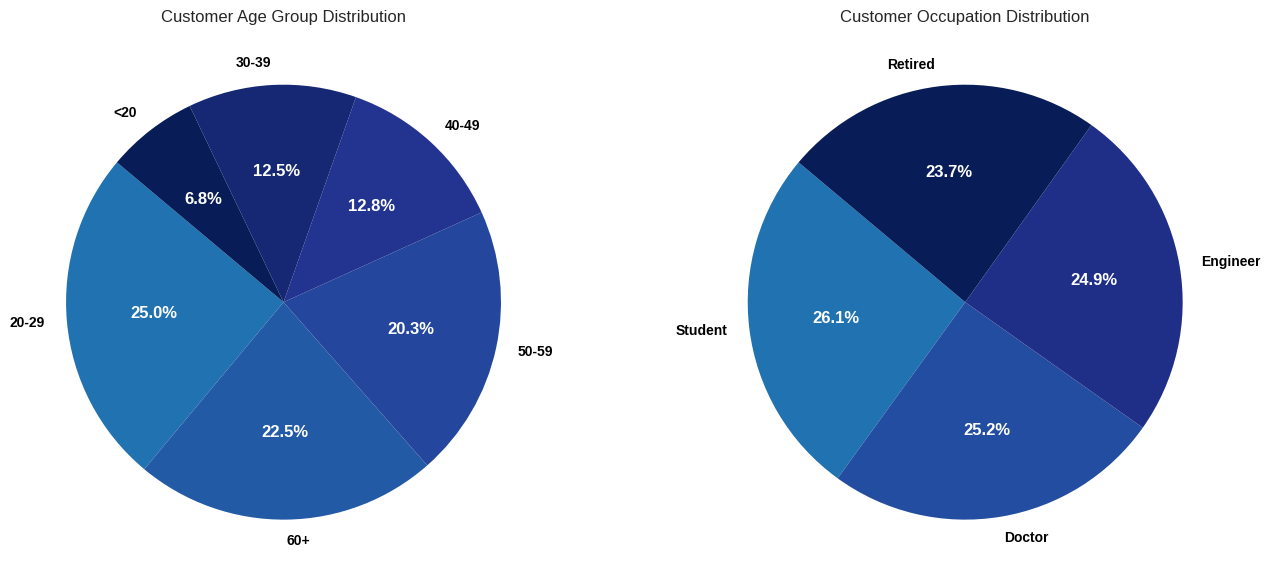

In [168]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df_EDA=df.copy()
df_EDA['AgeGroup'] = pd.cut(df_EDA['CustomerAge'], bins=age_bins, labels=age_labels)
# df=df_EDA.copy()
age_counts = df_EDA['AgeGroup'].value_counts().sort_values(ascending=False)
occupation_counts = df_EDA['CustomerOccupation'].value_counts().nlargest(6)

cmap = plt.cm.YlGnBu
colors_age = [cmap(0.7 + 0.3 * (i / (len(age_counts) - 1))) for i in range(len(age_counts))]
colors_occ = [cmap(0.7 + 0.3 * (i / (len(occupation_counts) - 1))) for i in range(len(occupation_counts))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

wedges1, texts1, autotexts1 = axes[0].pie(
    age_counts,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_age
)
axes[0].set_title('Customer Age Group Distribution')

wedges2, texts2, autotexts2 = axes[1].pie(
    occupation_counts,
    labels=occupation_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_occ
)
axes[1].set_title('Customer Occupation Distribution')

for text in texts1 + texts2:
    text.set_color('black')
    text.set_fontweight('bold')

for autotext in autotexts1 + autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

Dengan menggunakan data dengan kondisi apa adanya (sebelum pre-processing) sekilas dapat kita lakukan eksplorasi untuk memahami data yang dimiliki. Berdasarkan PieChart tersebut dapat diketahui mayoritas usia customer memiliki rentang usia 20-29 tahun dengan proporsi 25% dari total customer. Jenis pekerjaan yang menjadi mayoritas juga merupakan Student yang memiliki proporsi 26.1% dari total seluruh customer. Dengan mayoritas usia yang cenderung muda dan jenis pekerjaan yang dimiliki mayoritas juga student hal ini dapat dijadikan bahan analisis untuk menentukan metode pendekatan customer yang tepat untuk mencapai kebutuhan tertentu seperte customer retention dan lainnya.

<ipython-input-169-73e8034ffe1e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = df_EDA.groupby(['AgeGroup', 'TransactionType'])['TransactionAmount'].sum().unstack().fillna(0)


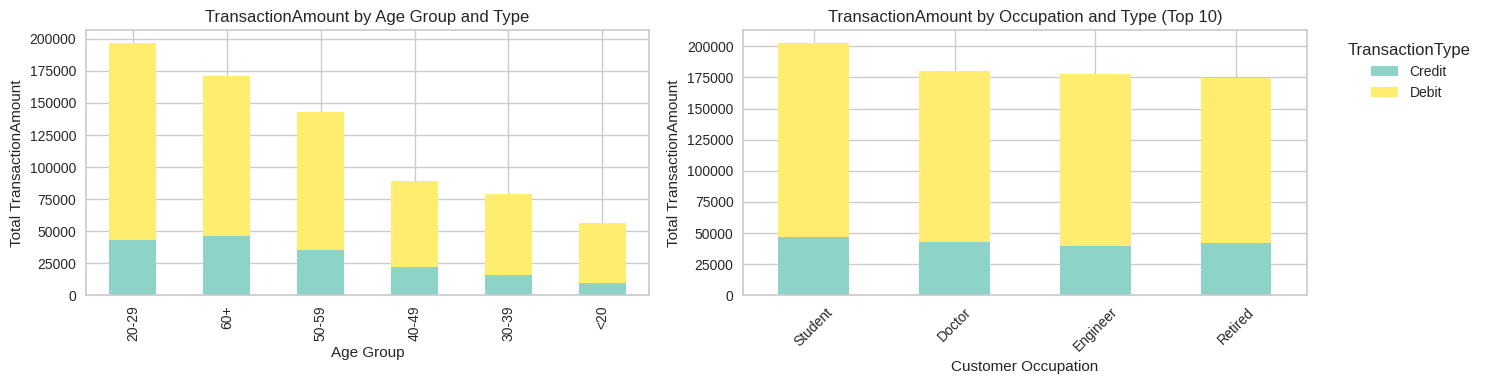

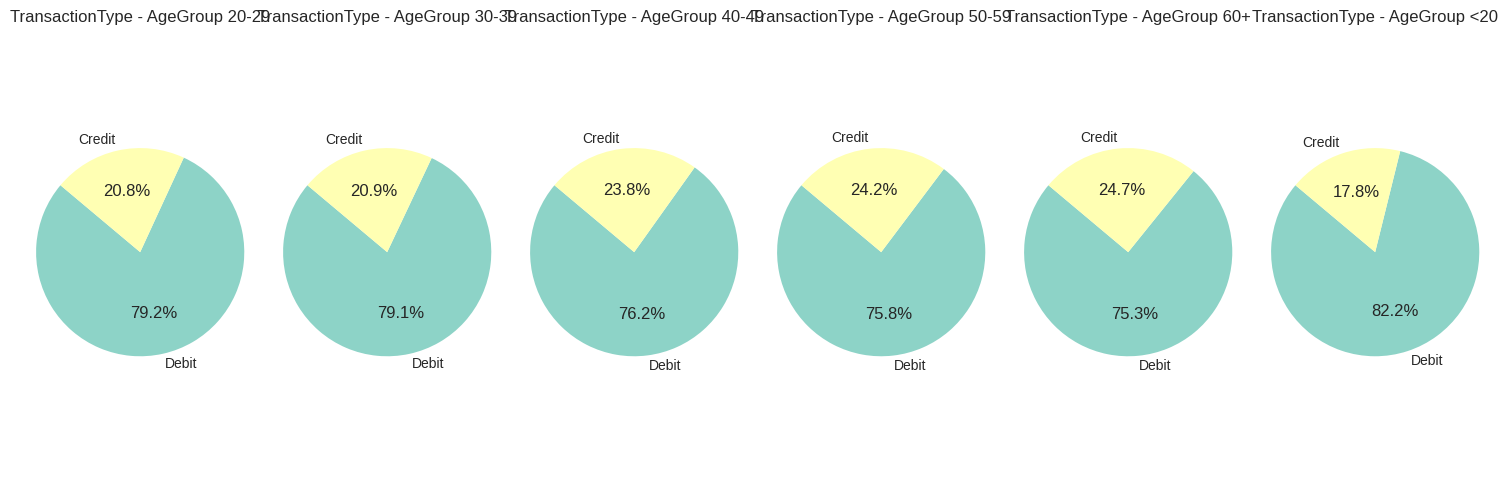

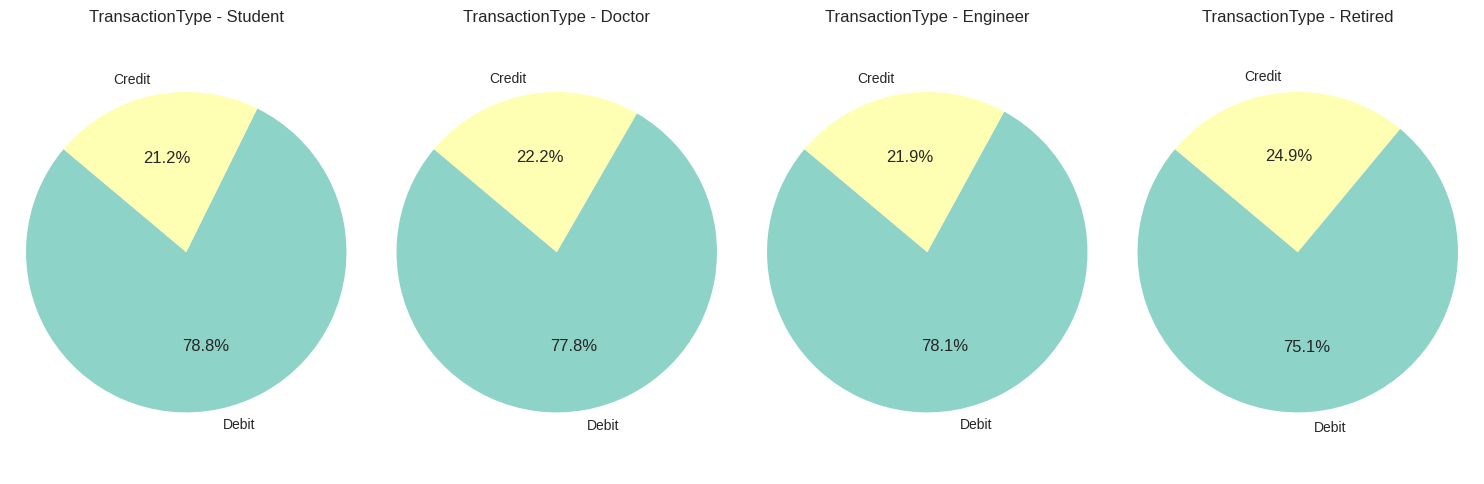

In [169]:
age_group = df_EDA.groupby(['AgeGroup', 'TransactionType'])['TransactionAmount'].sum().unstack().fillna(0)

age_group = age_group.loc[age_group.sum(axis=1).sort_values(ascending=False).index]

top_occupations = df_EDA['CustomerOccupation'].value_counts().index
df_top_occ = df_EDA[df_EDA['CustomerOccupation'].isin(top_occupations)]
occ_group = df_top_occ.groupby(['CustomerOccupation', 'TransactionType'])['TransactionAmount'].sum().unstack().fillna(0)

occ_group = occ_group.loc[occ_group.sum(axis=1).sort_values(ascending=False).index]

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

age_group.plot(kind='bar', stacked=True, colormap='Set3', ax=axes[0])
axes[0].set_title('TransactionAmount by Age Group and Type')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Total TransactionAmount')
axes[0].legend(title='TransactionType', loc='upper right').remove()

occ_group.plot(kind='bar', stacked=True, colormap='Set3', ax=axes[1])
axes[1].set_title('TransactionAmount by Occupation and Type (Top 10)')
axes[1].set_xlabel('Customer Occupation')
axes[1].set_ylabel('Total TransactionAmount')
axes[1].tick_params(axis='x', rotation=45)
# axes[1].legend(title='TransactionType', loc='upper right')
axes[1].legend(title='TransactionType', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

unique_age_groups = df_EDA['AgeGroup'].dropna().unique()
n_age = len(unique_age_groups)
colors = plt.cm.Set3.colors[:len(unique_age_groups)]

fig, axes = plt.subplots(1, n_age, figsize=(15, 5))
if n_age == 1:
    axes = [axes]

for i, age_group in enumerate(sorted(unique_age_groups)):
    subset = df_EDA[df_EDA['AgeGroup'] == age_group]
    type_counts = subset['TransactionType'].value_counts()
    axes[i].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140,
                colors=colors)
    axes[i].set_title(f'TransactionType - AgeGroup {age_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

top_occupations = df_EDA['CustomerOccupation'].value_counts().index
n_occ = len(top_occupations)
colors = plt.cm.Set3.colors[:len(top_occupations)]  # Ambil sebanyak jumlah label

fig, axes = plt.subplots(1, n_occ, figsize=(15, 5))
if n_occ == 1:
    axes = [axes]

for i, occupation in enumerate(top_occupations):
    subset = df_EDA[df_EDA['CustomerOccupation'] == occupation]
    type_counts = subset['TransactionType'].value_counts()
    axes[i].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140,
                colors=colors)
    axes[i].set_title(f'TransactionType - {occupation}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

Dari sini dapat dilihat TransactionAmount tertinggi terjadi pada segment customer berusia 20-29 tahun dan segment customer dengan jenis pekerjaan Student. Meskipun begitu, transaksi yang banyak dilakukan bertipe debit hal ini menunjukkan perilaku yang lebih condong konsumtif jika kita bandingkan dengan segment customer berusia 60+ yang cenderung memiliki transaksi credit lebih besar. Hal ini karena pada usia 60+ cenderung ingin mengamankan aset mereka. Dengan demikian ini juga bisa menjadi dasar dalam menentukan pelayanan yang tepat pada masing-masing segment customer.

<ipython-input-170-41b096337ddf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['AgeGroup'] = pd.cut(df_latest['CustomerAge'], bins=age_bins, labels=age_labels)
<ipython-input-170-41b096337ddf>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_balance = df_latest.groupby('AgeGroup')['AccountBalance'].sum().sort_values(ascending=False)


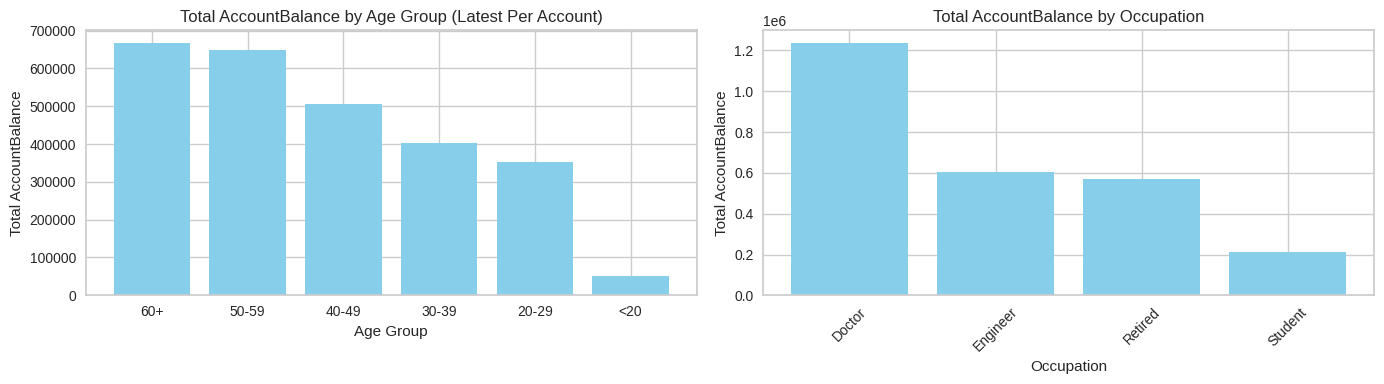

In [170]:
df_EDA['TransactionDate'] = pd.to_datetime(df_EDA['TransactionDate'], errors='coerce')

df_sorted = df_EDA.sort_values(by='TransactionDate', ascending=False)

df_latest = df_sorted.drop_duplicates(subset='AccountID', keep='first')

df_latest['AgeGroup'] = pd.cut(df_latest['CustomerAge'], bins=age_bins, labels=age_labels)

age_balance = df_latest.groupby('AgeGroup')['AccountBalance'].sum().sort_values(ascending=False)

occupation_balance = df_latest.groupby('CustomerOccupation')['AccountBalance'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].bar(age_balance.index.astype(str), age_balance.values, color='skyblue')
axes[0].set_title('Total AccountBalance by Age Group (Latest Per Account)')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Total AccountBalance')

axes[1].bar(occupation_balance.index, occupation_balance.values, color='skyblue')
axes[1].set_title('Total AccountBalance by Occupation')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Total AccountBalance')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Berbanding lurus dengan grafik yang sebelum nya diperoleh, dimana jenis transaksi kredit lebih banyak terjadi pada segment customer berusia 60+ ini tentu berimplikasi pada Total AccountBalance yang tinggi pada usia 60+. Namun tidak hanya itu, dapat dilihat juga seiring usia yang semakin tua semakin banyak orang yang cenderung menyimpan uang mereka. Ini dapat berkaitan dengan pola customer yang memilih untuk mengamankan kemampuan financial mereka untuk jangka panjang. Dapat dilihat juga jenis pekerjaan Doctor merupakan jenis pekerjaan yang berkontribusi besar terhadap total AccountBalance. Sebagai langkah strategis perbankan, segment customer yang memiliki usia>20 dan memiliki jenis pekerjaan Doctor dapat dijadikan prioritas dalam pelayanan untuk mendorong pertumbuhan customer dalam segment tersebut sehingga memiliki dampak positif untuk dapat mendukung likuiditas dan pertumbuhan aset perbankan.

**Degan mengakumulasikan data AccountBalance berdasarkan transactionDate terakhir pada setiap Account, diperoleh total AccountBalance.*




# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [171]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


Terdapat field dengan data-data yang null seperti pada informasi yang diperoleh diatas. Data-data null tersebut perlu diberikan treatment seperti imputasi ataupun amputasi agar tidak memberikan dampak bias pada saat pelatihan model machine learning.

In [172]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [173]:
df[df.duplicated()]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
2512,TX001748,AC00305,506.90,2023-11-01 17:44:46,Credit,Houston,D000337,138.210.196.19,M038,Branch,64.0,Doctor,56.0,1.0,11471.87,2024-11-04 08:10:09
2514,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,77.0,Retired,296.0,1.0,2042.22,2024-11-04 08:11:44
2515,TX001348,AC00455,787.41,2023-06-19 16:22:28,Debit,Memphis,D000351,150.25.200.56,M081,Online,25.0,Student,39.0,1.0,300.87,2024-11-04 08:06:44
2516,TX000986,AC00278,121.17,2023-12-25 17:31:16,Debit,Phoenix,D000573,155.19.119.0,M053,ATM,68.0,Doctor,158.0,1.0,12990.77,2024-11-04 08:10:12
2517,TX002364,AC00327,21.90,2023-04-10 17:04:28,Debit,Phoenix,D000216,136.172.149.77,M084,ATM,28.0,Student,30.0,1.0,1052.27,2024-11-04 08:11:15
2518,TX001913,AC00076,515.94,2023-12-22 16:42:33,Debit,San Francisco,D000606,27.215.118.94,M049,ATM,29.0,Engineer,37.0,1.0,1389.89,2024-11-04 08:11:10
2519,TX001360,AC00113,174.39,2023-01-09 16:08:52,Debit,San Francisco,D000078,98.255.160.110,M015,ATM,19.0,Student,36.0,1.0,1127.08,2024-11-04 08:11:01
2520,TX001373,AC00116,356.56,2023-10-09 17:23:21,Debit,New York,D000399,157.130.28.27,M100,Online,47.0,Engineer,52.0,1.0,2485.73,2024-11-04 08:11:57
2521,TX000884,AC00448,183.32,2023-05-10 16:27:51,Debit,Raleigh,D000450,162.207.77.170,M041,ATM,21.0,Student,74.0,1.0,137.42,2024-11-04 08:09:31
2522,TX002326,AC00003,20.17,2023-01-02 16:45:05,Debit,San Antonio,D000287,221.23.158.87,M088,ATM,77.0,Retired,86.0,1.0,3869.37,2024-11-04 08:08:39


Terdapat sebanyak 21 baris data duplikat, kita dapat melakukan drop duplikat atas data-data tersebut agar memperoleh data yang bersih.

In [174]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

kolnum = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

scaler = MinMaxScaler()

df_scaled = df.copy()

df_scaled[kolnum] = scaler.fit_transform(df_scaled[kolnum])

df_scaled.head()
# print(df_scaled[kolnum].describe())


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


Digunakan minmax Scaler dengan pertimbangan distribusi data yang tidak ideal atau normal. Selain itu juga agar tidak ada fitur yang mendominasi jarak antar data karena akan dilakukan tahap clustering dengan menggunakan model berbasis jarak yakni K-Means yang mana tentu sensitif terhadap jarak data.

In [175]:
df_scaled['CustomerAge_1']=df['CustomerAge']

In [176]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
koldrop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']

df_scaled_clean = df_scaled.drop(columns=koldrop, errors='ignore')

# print(df_scaled_clean.columns)
df_scaled_clean.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_1
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,70.0
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,68.0
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,19.0
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,26.0
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39,NaN


In [177]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

df_encoded = pd.get_dummies(df_scaled_clean, columns=categorical_cols, drop_first=False)

df_encoded.head()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_1,TransactionType_Credit,TransactionType_Debit,Location_Albuquerque,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,Location_Charlotte,Location_Chicago,Location_Colorado Springs,Location_Columbus,Location_Dallas,Location_Denver,Location_Detroit,Location_El Paso,Location_Fort Worth,Location_Fresno,Location_Houston,Location_Indianapolis,Location_Jacksonville,Location_Kansas City,Location_Las Vegas,Location_Los Angeles,Location_Louisville,Location_Memphis,Location_Mesa,Location_Miami,Location_Milwaukee,Location_Nashville,Location_New York,Location_Oklahoma City,Location_Omaha,Location_Philadelphia,Location_Phoenix,Location_Portland,Location_Raleigh,Location_Sacramento,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,0.007207,2023-04-11 16:29:14,0.838710,0.244828,0.0,0.336832,2024-11-04 08:08:08,70.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False
1,0.195940,2023-06-27 16:44:19,0.806452,0.451724,0.0,0.918055,2024-11-04 08:09:35,68.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,0.065680,2023-07-10 18:16:08,0.016129,0.158621,0.0,0.068637,2024-11-04 08:07:04,19.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,0.096016,2023-05-05 16:32:11,0.129032,0.051724,0.0,0.569198,2024-11-04 08:09:06,26.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,0.006874,2023-10-16 17:51:24,NaN,0.648276,0.0,0.492591,2024-11-04 08:06:39,NaN,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


Menggunakan pd.get_dummies karena fitur-fitur tersebut merupakan kategori yang tidak urut (nominal).

In [178]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_encoded.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate',
 'CustomerAge_1',
 'TransactionType_Credit',
 'TransactionType_Debit',
 'Location_Albuquerque',
 'Location_Atlanta',
 'Location_Austin',
 'Location_Baltimore',
 'Location_Boston',
 'Location_Charlotte',
 'Location_Chicago',
 'Location_Colorado Springs',
 'Location_Columbus',
 'Location_Dallas',
 'Location_Denver',
 'Location_Detroit',
 'Location_El Paso',
 'Location_Fort Worth',
 'Location_Fresno',
 'Location_Houston',
 'Location_Indianapolis',
 'Location_Jacksonville',
 'Location_Kansas City',
 'Location_Las Vegas',
 'Location_Los Angeles',
 'Location_Louisville',
 'Location_Memphis',
 'Location_Mesa',
 'Location_Miami',
 'Location_Milwaukee',
 'Location_Nashville',
 'Location_New York',
 'Location_Oklahoma City',
 'Location_Omaha',
 'Location_Philadelphia',
 'Location_Phoenix',
 'Location_Portland',
 'Location_Raleigh',
 'Location_Sacramen

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [179]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_impute_dropna = df_encoded.fillna(df_encoded.median(numeric_only=True)).dropna()

# df_impute_dropna.isnull().sum()

Menggunakan kombinasi imputasi data dan dropna, dimana imputasi digunakan pada data numerik menggunakan nilai Median dengan pertimbangan lebih robust terhadap outlier mengingat tahapan drop outlier baru akan dilakukan di proses berikutnya berdasarkan ketentuan template. Selain itu dropna dilakukan karena masih ada fitur seperti date yang memerlukan pengkondisian lebih lanjut untuk dapat mengisi nilai null pada transactionDate dan previoustransactionDate serta data yang nan pada fitur tersebut sangat minim proporsinya <30 data sehingga digunakan dropna untuk memudahkan.

In [180]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_clean_drop = df_impute_dropna.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [181]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
num_cols = df_clean_drop.select_dtypes(include='number').columns

df_scaled = pd.DataFrame(df_clean_drop, columns=num_cols, index=df_clean_drop.index)

# Fungsi deteksi outlier menggunakan IQR
def detect_outliers_iqr_post_scaling(df_scaled, col):
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df_scaled[(df_scaled[col] < lower) | (df_scaled[col] > upper)]


outlier_summary = {}
for col in df_scaled.columns:
    outliers = detect_outliers_iqr_post_scaling(df_scaled, col)
    outlier_summary[col] = len(outliers)

# print("Jumlah outlier per fitur:")
# for col, count in outlier_summary.items():
#     print(f"{col}: {count}")

df_imputed = df_clean_drop.copy()

for col in num_cols:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_mask = (df_scaled[col] < lower) | (df_scaled[col] > upper)

    if col=='LoginAttempts':
      valueNew= df_scaled[col].mean()
    else:
      valueNew= df_scaled[col].median()
    # print(valueNew)
    df_imputed.loc[outlier_mask, col] = valueNew

df_imputed.head()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_1,TransactionType_Credit,TransactionType_Debit,Location_Albuquerque,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,Location_Charlotte,Location_Chicago,Location_Colorado Springs,Location_Columbus,Location_Dallas,Location_Denver,Location_Detroit,Location_El Paso,Location_Fort Worth,Location_Fresno,Location_Houston,Location_Indianapolis,Location_Jacksonville,Location_Kansas City,Location_Las Vegas,Location_Los Angeles,Location_Louisville,Location_Memphis,Location_Mesa,Location_Miami,Location_Milwaukee,Location_Nashville,Location_New York,Location_Oklahoma City,Location_Omaha,Location_Philadelphia,Location_Phoenix,Location_Portland,Location_Raleigh,Location_Sacramento,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,0.007207,2023-04-11 16:29:14,0.838710,0.244828,0.0,0.336832,2024-11-04 08:08:08,70.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False
1,0.195940,2023-06-27 16:44:19,0.806452,0.451724,0.0,0.918055,2024-11-04 08:09:35,68.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,0.065680,2023-07-10 18:16:08,0.016129,0.158621,0.0,0.068637,2024-11-04 08:07:04,19.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,0.096016,2023-05-05 16:32:11,0.129032,0.051724,0.0,0.569198,2024-11-04 08:09:06,26.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,0.006874,2023-10-16 17:51:24,0.435484,0.648276,0.0,0.492591,2024-11-04 08:06:39,45.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


Oleh karena terdapat cukup banyak outlier pada fitur TransactionAmount dan LoginAttempts, maka agar dapat menjaga dan mengoptimalkan informasi yang dimiliki untuk pelatihan, dilakukan imputasi terhadap data TransactionAmount menggunakan nilai median karena lebih robust terhadap outlier. Namun untuk fitur LoginAttempts digunakan mean karena median nya 0 sehingga tidak dimungkinkan untuk menggunakan median.

In [182]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

le = LabelEncoder()

age_bins = [0, 19, 29, 39, 49, 59, 120]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

df_imputed['CustomerAgeEncoded'] = le.fit_transform(pd.cut(df_imputed['CustomerAge_1'], bins=age_bins, labels=age_labels, right=True))

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df_imputed['is_weekend'] = df['TransactionDate'].dt.dayofweek.apply(lambda x: 1 if x >= 4 else 0)
df_postprepros=df_imputed.drop(columns=['CustomerAge_1'])
bool_cols = df_postprepros.select_dtypes(include='bool').columns
df_postprepros[bool_cols] = df_postprepros[bool_cols].astype(int)

df_postprepros.head()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Credit,TransactionType_Debit,Location_Albuquerque,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,Location_Charlotte,Location_Chicago,Location_Colorado Springs,Location_Columbus,Location_Dallas,Location_Denver,Location_Detroit,Location_El Paso,Location_Fort Worth,Location_Fresno,Location_Houston,Location_Indianapolis,Location_Jacksonville,Location_Kansas City,Location_Las Vegas,Location_Los Angeles,Location_Louisville,Location_Memphis,Location_Mesa,Location_Miami,Location_Milwaukee,Location_Nashville,Location_New York,Location_Oklahoma City,Location_Omaha,Location_Philadelphia,Location_Phoenix,Location_Portland,Location_Raleigh,Location_Sacramento,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAgeEncoded,is_weekend
0,0.007207,2023-04-11 16:29:14,0.838710,0.244828,0.0,0.336832,2024-11-04 08:08:08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,4,0
1,0.195940,2023-06-27 16:44:19,0.806452,0.451724,0.0,0.918055,2024-11-04 08:09:35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,4,0
2,0.065680,2023-07-10 18:16:08,0.016129,0.158621,0.0,0.068637,2024-11-04 08:07:04,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,5,0
3,0.096016,2023-05-05 16:32:11,0.129032,0.051724,0.0,0.569198,2024-11-04 08:09:06,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,0.006874,2023-10-16 17:51:24,0.435484,0.648276,0.0,0.492591,2024-11-04 08:06:39,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0


Binning data dilakukan untuk mengelompokkan usia customer menjadi kategori umur <20, 20-29, 30-39, 40-49, 50-59, 60+ dan juga menentukan hari transaksi dilakukan untuk kemudian dilakukan binning data untuk mengelompokkan transaksi dilakukan di hari weekdays atau weekend. Setelah itu juga dilakukan labelEncode terhadap data customer grup yang sudah dibuat. Selain itu juga melakukan encode pada kolom-kolom yang bertipe data bool ke dalam angka numerik dimana 1 mewakili True dan 0 mewakili False.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [183]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

df_postprepros.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Location_Albuquerque,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,Location_Charlotte,Location_Chicago,Location_Colorado Springs,Location_Columbus,Location_Dallas,Location_Denver,Location_Detroit,Location_El Paso,Location_Fort Worth,Location_Fresno,Location_Houston,Location_Indianapolis,Location_Jacksonville,Location_Kansas City,Location_Las Vegas,Location_Los Angeles,Location_Louisville,Location_Memphis,Location_Mesa,Location_Miami,Location_Milwaukee,Location_Nashville,Location_New York,Location_Oklahoma City,Location_Omaha,Location_Philadelphia,Location_Phoenix,Location_Portland,Location_Raleigh,Location_Sacramento,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAgeEncoded,is_weekend
count,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000
mean,0.131064,0.430675,0.377875,0.001482,0.338191,0.223396,0.764825,0.016247,0.023558,0.023558,0.019496,0.023558,0.026807,0.023964,0.023558,0.021527,0.018684,0.025183,0.023964,0.017872,0.027620,0.023964,0.025589,0.023152,0.023558,0.023152,0.021527,0.026807,0.020309,0.024777,0.023964,0.024777,0.021933,0.021527,0.023558,0.026807,0.025183,0.025995,0.021121,0.017059,0.023152,0.021121,0.022746,0.023152,0.022340,0.023558,0.023964,0.026807,0.022340,0.018278,0.329001,0.344435,0.316003,0.252234,0.245329,0.235581,0.257514,2.185215,0.147847
std,0.109983,0.286147,0.240787,0.006578,0.261010,0.416606,0.424194,0.126450,0.151699,0.151699,0.138290,0.151699,0.161553,0.152969,0.151699,0.145163,0.135434,0.156712,0.152969,0.132512,0.163914,0.152969,0.157938,0.150416,0.151699,0.150416,0.145163,0.161553,0.141083,0.155475,0.152969,0.155475,0.146496,0.145163,0.151699,0.161553,0.156712,0.159153,0.143817,0.129519,0.150416,0.143817,0.149122,0.150416,0.147815,0.151699,0.152969,0.161553,0.147815,0.133981,0.469946,0.475280,0.465009,0.434383,0.430370,0.424447,0.437354,1.637823,0.355021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043168,0.145161,0.182759,0.000000,0.095703,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.110014,0.435484,0.351724,0.00

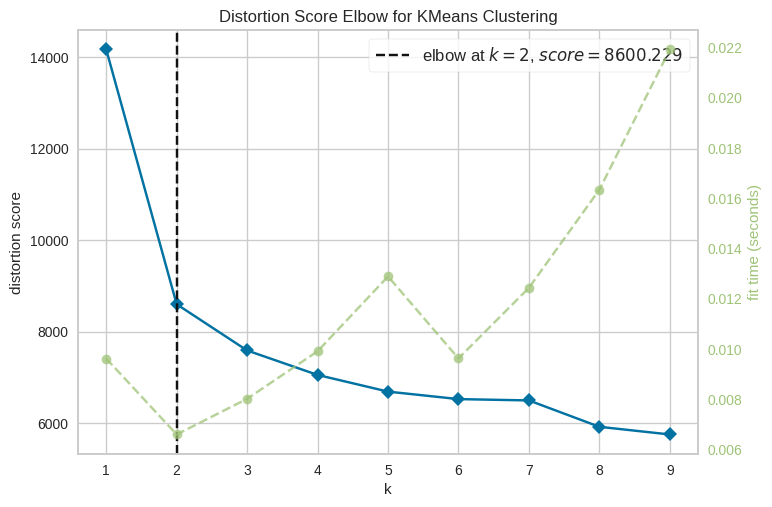

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [184]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_postprepros.drop(['TransactionDate', 'PreviousTransactionDate'], axis=1))
visualizer.show()

Berdasarkan elbow methode yang digunakan untuk menentukan nilai K yang perlu ditentukan dalam algoritma K-Means clustering diperoleh nilai K=3 sebagai nilai yang paling optimal berdasarkan metode tersebut.

In [185]:
# Menggunakan algoritma K-Means Clustering
optimal_k = 3
df_model=df_postprepros.copy()
X = df_model.drop(['TransactionDate', 'PreviousTransactionDate'], axis=1)
# X.isna().sum()
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_model.fit_predict(X)

df_model['Cluster'] = cluster_labels

print(df_model['Cluster'].value_counts())
df_model.head()

Cluster
2    1190
1     653
0     619
Name: count, dtype: int64


,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Credit,TransactionType_Debit,Location_Albuquerque,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,Location_Charlotte,Location_Chicago,Location_Colorado Springs,Location_Columbus,Location_Dallas,Location_Denver,Location_Detroit,Location_El Paso,Location_Fort Worth,Location_Fresno,Location_Houston,Location_Indianapolis,Location_Jacksonville,Location_Kansas City,Location_Las Vegas,Location_Los Angeles,Location_Louisville,Location_Memphis,Location_Mesa,Location_Miami,Location_Milwaukee,Location_Nashville,Location_New York,Location_Oklahoma City,Location_Omaha,Location_Philadelphia,Location_Phoenix,Location_Portland,Location_Raleigh,Location_Sacramento,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAgeEncoded,is_weekend,Cluster
0,0.007207,2023-04-11 16:29:14,0.838710,0.244828,0.0,0.336832,2024-11-04 08:08:08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,4,0,2
1,0.195940,2023-06-27 16:44:19,0.806452,0.451724,0.0,0.918055,2024-11-04 08:09:35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,4,0,2
2,0.065680,2023-07-10 18:16:08,0.016129,0.158621,0.0,0.068637,2024-11-04 08:07:04,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,5,0,2
3,0.096016,2023-05-05 16:32:11,0.129032,0.051724,0.0,0.569198,2024-11-04 08:09:06,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,0.006874,2023-10-16 17:51:24,0.435484,0.648276,0.0,0.492591,2024-11-04 08:06:39,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,1


Kini kita telah memperoleh nilai cluster dari setiap baris-baris data yang mana nilai ini nantinya akan digunakan sebagai nilai target dalam metode klasifikasi yang akan dilakukan untuk dapat menentukan segmentasi customer baru.

Jalankan cell code ini untuk menyimpan model kamu.

In [186]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans_model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [187]:
# Menghitung dan menampilkan nilai Silhouette Score.
X_scaled = df_model.drop(columns=['Cluster', 'TransactionDate', 'PreviousTransactionDate'])

sil_score = silhouette_score(X_scaled, df_model['Cluster'])

print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2152


Nilai silhouette menunjukkan keterpisahan dari suatu kelompok data/cluster satu terhadap kelompok data/cluster lainnya. Sebelumnya, elbow method digunakan untuk menentukan nilai K atau banyak cluster dalam algoritma K-Means clustering dimana elbow methode bekerja dengan menggunakan prinsip mencari nilai k terbaik di mana penambahan cluster tidak lagi memberikan pengurangan yang signifikan dalam "inertia" (dalam-cluster error). Rendahnya nilai silhouette score tidak serta merta menunjukkan clustering yang buruk karena hal ini dapat diakibatkan oleh salah satunya faktor high dimensionality dari data yang digunakan. Untuk mengatasi hal tersebut dapat dilakukan dengan mengurangi high dimensionality data menggunakan metode PCA.



<ipython-input-188-454a0356c0da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='Cluster', y=col, palette='Set2')
<ipython-input-188-454a0356c0da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='Cluster', y=col, palette='Set2')
<ipython-input-188-454a0356c0da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='Cluster', y=col, palette='Set2')
<ipython-input-188-454a0356c0da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

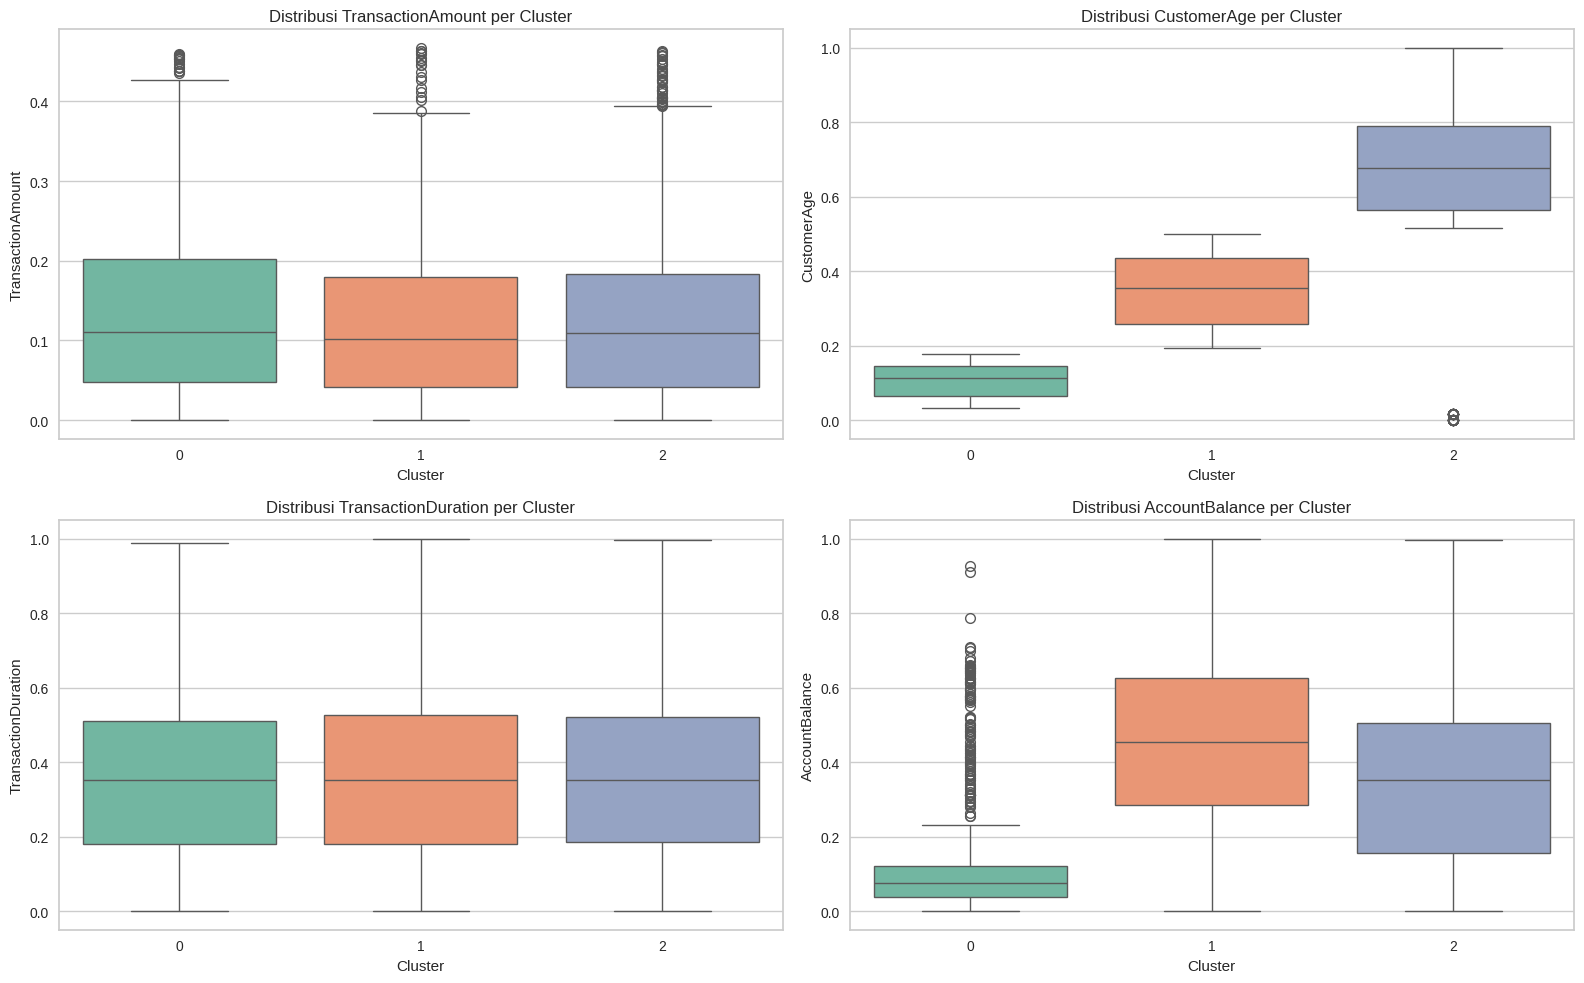

In [188]:
# Membuat visualisasi hasil clustering
features_to_plot = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_model, x='Cluster', y=col, palette='Set2')
    plt.title(f'Distribusi {col} per Cluster')
plt.tight_layout()
plt.show()


Berdasarkan hasil tersebut dapat diketahui informasi terkait distribusi setiap fitur pada setiap cluster dimana pada fitur CustomerAge dapat diketahui secara berurutan median cluster 0<cluster 1<cluster 2 ini menandakan cluster 0 didominasi customer usia muda, cluster 1 usia dewasa, dan cluster 2 usia tua. Pada fitur TransactionAmount cluster 0 memiliki nilai TransactionAmount yang cukup tinggi dibandingkan 2 cluster lainnya yang menunjukkan usia muda lebih banyak melakukan spend money. Sedangkan cluster 1 dan cluster 2 cenderung mirip. Pada fitur AccountBalance cluster 1 memiliki nilai yang cukup tinggi karena usia dewasa menrupakan usia yang masih produktif dan berpenghasilan dibandingkan usia tua terlebih lagi usia muda yang dapat dilihat median nya jauh di bawah cluster 1 dan 2 meskipun terdapat data yang berada diatas upper extreme yang kemungkinan didasari oleh faktor keluarga yang kaya.

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [189]:
# Membangun model menggunakan PCA.
df_modelPCA=df_postprepros.copy()
X = df_modelPCA.drop(['TransactionDate', 'PreviousTransactionDate'], axis=1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

PCA_model_clustering = KMeans(n_clusters=3, random_state=42)
cluster_labels = PCA_model_clustering.fit_predict(X_pca)

df_modelPCA['Cluster'] = cluster_labels

In [190]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(PCA_model_clustering, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [191]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

pd.set_option('display.max_columns', None)
df_desc=df_model.groupby('Cluster')[['TransactionAmount','CustomerAge','AccountBalance']].agg(['mean', 'min', 'median', 'max'])
df_desc.columns = ['_'.join(col).strip() for col in df_desc.columns]
df_desc.reset_index(inplace=True)
df_desc

,Cluster,TransactionAmount_mean,TransactionAmount_min,TransactionAmount_median,TransactionAmount_max,CustomerAge_mean,CustomerAge_min,CustomerAge_median,CustomerAge_max,AccountBalance_mean,AccountBalance_min,AccountBalance_median,AccountBalance_max
0,0,0.140498,0.000000,0.110014,0.459046,0.106363,0.032258,0.112903,0.177419,0.147849,0.000000,0.076713,0.926965
1,1,0.125115,0.000031,0.101905,0.467223,0.348194,0.193548,0.354839,0.500000,0.462928,0.000774,0.454522,1.000000
2,2,0.129420,0.000302,0.109792,0.462939,0.644633,0.000000,0.677419,1.000000,0.368753,0.001320,0.352509,0.997633


In [192]:
cols_to_check = ['Channel_Branch', 'Channel_Online',
                 'CustomerOccupation_Engineer', 'CustomerOccupation_Retired',
                 'CustomerOccupation_Student','is_weekend']

counts_per_cluster = df_model.groupby('Cluster')[cols_to_check].sum()

counts_per_cluster

,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,is_weekend
Cluster,,,,,,
0,225,198,75,0,519,97
1,220,215,354,8,2,89
2,403,365,175,572,113,178


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 0: (AccountBalance Rendah, Usia Muda, Mayoritas Pelajar)**:
  - Rata-rata (mean) TransactionAmount: 0.14 (paling tinggi dari semua cluster)
  - Rata-rata (mean) CustomerAge: 0.11 (sangat muda)
  - Rata-rata (mean) AccountBalance: 0.15 (paling rendah)
  - **Analisis:** Cluster ini memiliki saldo akun sangat rendah. Mayoritas berprofesi sebagai Pelajar (519). Memiliki aktivitas transaksi yang relatif sedang di akhir pekan (97 transaksi). Pelanggan di cluster ini adalah pengguna aktif dengan saldo rendah karena didominasi oleh pelajar namun memiliki jumlah transaksi yang tinggi. Usia muda ini cenderung konsumtif.

2. **Cluster 1: (AccountBalance Tinggi, Usia Dewasa, Mayoritas Pekerja Aktif)**:
  - Rata-rata (mean) TransactionAmount: 0.125
  - Rata-rata (mean) CustomerAge: 0.35
  - Rata-rata (mean) AccountBalance: 0.46
  - **Analisis:** Cluster ini memiliki distribusi transaksi di channel Branch (220) dan Online (215) yang hampir seimbang. Mayoritas berprofesi sebagai Engineer (354). Memiliki aktivitas transaksi yang relatif rendah di akhir pekan (89 transaksi). Pelanggan di cluster ini adalah pengguna aktif dengan saldo tinggi, usia sedang, kemungkinan profesional atau pekerja, dan cukup seimbang antara online dan offline.

3. **Cluster 2: (AccountBalance Sedang, Usia Tua, Mayoritas Pensiunan)**:
  - Rata-rata (mean) TransactionAmount: 0.13
  - Rata-rata (mean) CustomerAge: 0.64 (paling tinggi)
  - Rata-rata (mean) AccountBalance: 0.37
  - **Analisis:** Cluster ini memiliki saldo sedang tapi tetap signifikan. Memiliki kombinasi channel Branch (403) dan Online (365) yang banyak.Didominasi oleh pensiunan (572) dan sebagian engineer (175). Aktivitas akhir pekan tertinggi (178 transaksi). Pelanggan di cluster ini merupakan customer senior, banyak pensiunan, dengan saldo cukup besar, dan masih cukup aktif dalam bertransaksi, baik secara online maupun offline

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [193]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_model.rename(columns={'Cluster': 'Target'}, inplace=True)

In [194]:
# Simpan Data
df_model.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [195]:
# inverse dataset ke rentang normal
kolnum = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df_model_original_num = pd.DataFrame(
    scaler.inverse_transform(df_model[kolnum]),
    columns=kolnum
)

def inverse_dummies_drop_first_false(df_encoded, original_columns):
    df_decoded = df_encoded.copy()

    for col in original_columns:
        dummy_cols = [c for c in df_encoded.columns if c.startswith(col + '_')]
        if dummy_cols:
            df_decoded[col] = df_encoded[dummy_cols].idxmax(axis=1).str.replace(f'{col}_', '')
            df_decoded.drop(columns=dummy_cols, inplace=True)

    return df_decoded

# inverse dataset yang sudah diencode ke kategori aslinya.
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

df_model_original_cat = inverse_dummies_drop_first_false(df_model.drop(['TransactionAmount', 'CustomerAge','Target','CustomerAgeEncoded', 'TransactionDuration', 'LoginAttempts', 'AccountBalance'], axis=1), categorical_cols)
df_model_original_cat['is_weekend'] = df_model_original_cat['is_weekend'].apply(lambda x: 'WeekEnds' if x == 1 else 'WeekDays')

df_model_original_num = df_model_original_num.reset_index(drop=True)
df_model_original_cat = df_model_original_cat.reset_index(drop=True)

df_inverse = pd.concat([df_model_original_num, df_model_original_cat], axis=1)

df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,PreviousTransactionDate,is_weekend,TransactionType,Location,Channel,CustomerOccupation
0,14.09,70.0,81.0,1.0,5112.21,2023-04-11 16:29:14,2024-11-04 08:08:08,WeekDays,Debit,San Diego,ATM,Doctor
1,376.24,68.0,141.0,1.0,13758.91,2023-06-27 16:44:19,2024-11-04 08:09:35,WeekDays,Debit,Houston,ATM,Doctor
2,126.29,19.0,56.0,1.0,1122.35,2023-07-10 18:16:08,2024-11-04 08:07:04,WeekDays,Debit,Mesa,Online,Student
3,184.50,26.0,25.0,1.0,8569.06,2023-05-05 16:32:11,2024-11-04 08:09:06,WeekEnds,Debit,Raleigh,Online,Student
4,13.45,45.0,198.0,1.0,7429.40,2023-10-16 17:51:24,2024-11-04 08:06:39,WeekDays,Credit,Atlanta,Online,Student


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

1. **Cluster 0: (AccountBalance Rendah, Usia Muda, Mayoritas Pelajar)**:
  - Rata-rata (mean) TransactionAmount: `$269.854` (paling tinggi dari semua cluster)
  - Rata-rata (mean) CustomerAge: ~26 Tahun (sangat muda)
  - Rata-rata (mean) AccountBalance: `$2300.754` (paling rendah)
  - **Analisis:** Cluster ini memiliki saldo akun sangat rendah. Mayoritas berprofesi sebagai Pelajar (519). Memiliki aktivitas transaksi yang relatif sedang di akhir pekan (97 transaksi). Pelanggan di cluster ini adalah pengguna aktif dengan saldo rendah karena didominasi oleh pelajar namun memiliki jumlah transaksi yang tinggi. Usia muda ini cenderung konsumtif.

2. **Cluster 1: (AccountBalance Tinggi, Usia Dewasa, Mayoritas Pekerja Aktif)**:
  - Rata-rata (mean) TransactionAmount: `$240.337`
  - Rata-rata (mean) CustomerAge: ~40 Tahun
  - Rata-rata (mean) AccountBalance: `$6988.102`
  - **Analisis:** Cluster ini memiliki distribusi transaksi di channel Branch (220) dan Online (215) yang hampir seimbang. Mayoritas berprofesi sebagai Engineer (354). Memiliki aktivitas transaksi yang relatif rendah di akhir pekan (89 transaksi). Pelanggan di cluster ini adalah pengguna aktif dengan saldo tinggi, usia sedang, kemungkinan profesional atau pekerja, dan cukup seimbang antara online dan offline.

3. **Cluster 2: (AccountBalance Sedang, Usia Tua, Mayoritas Pensiunan)**:
  - Rata-rata (mean) TransactionAmount: `$248.598`
  - Rata-rata (mean) CustomerAge: ~58 Tahun (paling tinggi)
  - Rata-rata (mean) AccountBalance: `$5587.090`
  - **Analisis:** Cluster ini memiliki saldo sedang tapi tetap signifikan. Memiliki kombinasi channel Branch (403) dan Online (365) yang banyak.Didominasi oleh pensiunan (572) dan sebagian engineer (175). Aktivitas akhir pekan tertinggi (178 transaksi). Pelanggan di cluster ini merupakan customer senior, banyak pensiunan, dengan saldo cukup besar, dan masih cukup aktif dalam bertransaksi, baik secara online maupun offline

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [196]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

df_inverse = df_inverse.reset_index(drop=True)
df_model = df_model.reset_index(drop=True)

target = df_model['Target']

df_inverse['Target'] = target

In [197]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

pd.set_option('display.max_columns', None)
df_desc_inverse=df_inverse.groupby('Target')[['TransactionAmount','CustomerAge','AccountBalance']].agg(['mean', 'min', 'median', 'max'])
df_desc_inverse.columns = ['_'.join(col).strip() for col in df_desc_inverse.columns]
df_desc_inverse.reset_index(inplace=True)
df_desc_inverse

,Target,TransactionAmount_mean,TransactionAmount_min,TransactionAmount_median,TransactionAmount_max,CustomerAge_mean,CustomerAge_min,CustomerAge_median,CustomerAge_max,AccountBalance_mean,AccountBalance_min,AccountBalance_median,AccountBalance_max
0,0,269.854443,0.26,211.360,881.10,24.594507,20.0,25.0,29.0,2300.754071,101.25,1242.490,13891.47
1,1,240.337657,0.32,195.800,896.79,39.588055,30.0,40.0,49.0,6988.102481,112.76,6863.060,14977.99
2,2,248.598126,0.84,210.935,888.57,57.967227,18.0,60.0,80.0,5587.090319,120.89,5345.435,14942.78


In [198]:
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation', 'is_weekend']
for col in categorical_cols:
    print(f'\n=== Count for {col} by Cluster ===')
    print(df_inverse.groupby(['Target', col]).size().unstack(fill_value=0))



=== Count for TransactionType by Cluster ===
TransactionType  Credit  Debit
Target                        
0                   132    487
1                   153    500
2                   294    896

=== Count for Channel by Cluster ===
Channel  ATM  Branch  Online
Target                      
0        196     225     198
1        218     220     215
2        422     403     365

=== Count for CustomerOccupation by Cluster ===
CustomerOccupation  Doctor  Engineer  Retired  Student
Target                                                
0                       25        75        0      519
1                      289       354        8        2
2                      330       175      572      113

=== Count for is_weekend by Cluster ===
is_weekend  WeekDays  WeekEnds
Target                        
0                522        97
1                564        89
2               1012       178


In [199]:
df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,PreviousTransactionDate,is_weekend,TransactionType,Location,Channel,CustomerOccupation,Target
0,14.09,70.0,81.0,1.0,5112.21,2023-04-11 16:29:14,2024-11-04 08:08:08,WeekDays,Debit,San Diego,ATM,Doctor,2
1,376.24,68.0,141.0,1.0,13758.91,2023-06-27 16:44:19,2024-11-04 08:09:35,WeekDays,Debit,Houston,ATM,Doctor,2
2,126.29,19.0,56.0,1.0,1122.35,2023-07-10 18:16:08,2024-11-04 08:07:04,WeekDays,Debit,Mesa,Online,Student,2
3,184.50,26.0,25.0,1.0,8569.06,2023-05-05 16:32:11,2024-11-04 08:09:06,WeekEnds,Debit,Raleigh,Online,Student,0
4,13.45,45.0,198.0,1.0,7429.40,2023-10-16 17:51:24,2024-11-04 08:06:39,WeekDays,Credit,Atlanta,Online,Student,1


In [200]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)